### Medidas de dispersión

librerías necesarias: pandas , matplotlib , seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cars.csv')



Para hacer el cálculo de la desviación estándar se utiliza la función `.std()`
* Antes hay que especificar la columna que será analizada, invocando a la librería en cuestión y después especificando la columna por su posición en la lista (el nombre de la columna, no su número de array)

In [ ]:
df['price_usd'].std()

6428.1520182029035

Para calcular el rango de la distribución hay que operar la **diferencia** los valores más grandes (máximos) y los valores más pequeños (mínimos) de la distribución:
* usando las funciones `.max()` y `min()` respectivamente
* antes de eso, como en  el cálculo de "std"m, hay que especificar la columna del dataset que será afectada.

siendo de la siguiente forma: `df['price_usd'].max - df['price_usd']-min`

In [ ]:
rango = 0
rango =  df['price_usd'].max() - df['price_usd'].min()
rango

49999.0

#### Para calcular los cuartiles:
*Equivalencia en porcentajes de cada una de los cuartiles: Q1 = 25%  Q2 (µ) = 50% Q3 = 75%*
* * *a esto se le agregan los alores máximos y mínimos en cada extremo respectivamente: min = 0% max = 100%*
* * *(también pueden usarse las funciones `min()` y `max()`)

* **Quartil**: se usa la función `quantile()` especificando por un parámetro `q` su franja del cuartil
de la siguiente forma al ejercicio actual: `quartil_# = df['price_usd'].quantile(q=0.#)`

In [ ]:
#Quartiles
median = df['price_usd'].median()
Q1 = df['price_usd'].quantile(q=0.25)
Q3 = df['price_usd'].quantile(q=0.75)
min_val = df['price_usd'].quantile(q=0)
max_val = df['price_usd'].quantile(q=1.0)

print(min_val, Q1 , median , Q3 , max_val) 

1.0 2100.0 4800.0 8990.0 50000.0


Para calcular el **rango intercuartil**, simplemente se establese la  diferencia entre los cuartiles Q3 y Q1

In [ ]:
iqr = Q3 - Q1
iqr

6890.0

### Limites para detección de outliers
#### en datos simétricamente distribuidos

Datos entre $$Q_1 \times \text{IQR}$$ y $$Q_3 + 1.5 \times \text{IQR}$$

In [ ]:
min_limit = Q1 -1.5*iqr
max_limit = Q3 + 1.5*iqr

print('rango para detección de outliers {} {}:'.format(min_limit , max_limit))

rango para detección de outliers -8235.0 19325.0:


Al operar las variables se observa que el valor mínimo es negativo. Lo que deja en claro que la distribución NO es simétrica
* Este resultado matemáticamente no tiene sentido porque se está hablando de una variable donde solo se admiten valores positivos

*La razón de los valores negativos es porque se está tratando a la distribución como si fuera normal, cuando no lo es*

Para graficar una distribución simétrica  se usa la función `.histplot()` de la librería seaborn (sns)

<AxesSubplot:xlabel='price_usd', ylabel='Count'>

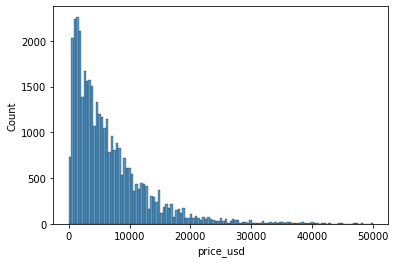

In [ ]:
sns.histplot(df['price_usd'])

Confirmando nuestra hipótesis anterior, se puede observa que la distribución tiene un claro sesgo a la izquierda

Para dibujar el diagrama de caja asociado a la distribución:
* se usa la función `boxplot()` con parámetros:
* * el dataset especificando la columna que se va a estudiar

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='price_usd'>

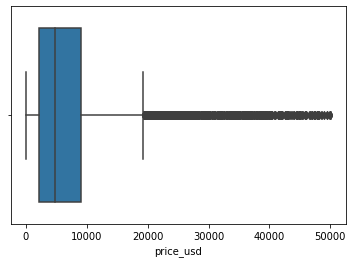

In [ ]:
sns.boxplot(df['price_usd'])

Para que quede más estético:



/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 269.79090909090905, '')]

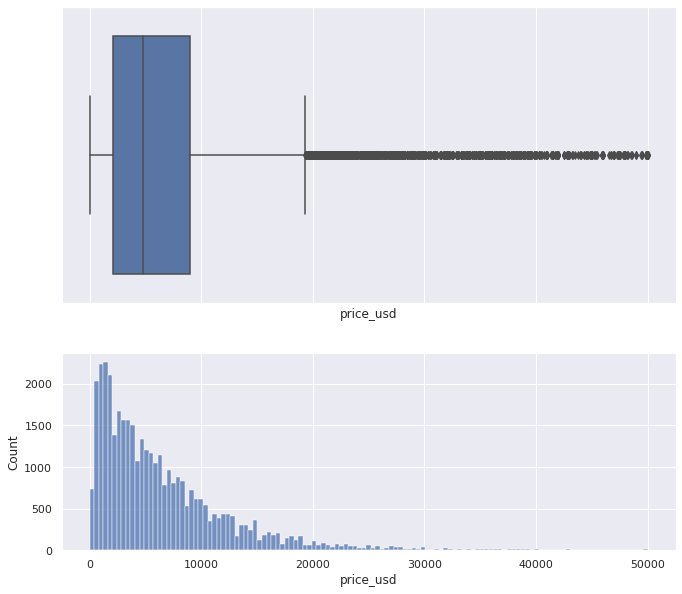

In [ ]:
sns.set(rc={'figure.figsize':(11,10)})
f , (ax_boxa , ax_histo) = plt.subplots(2, sharex = True , gridspec_kw = {"height_ratios": (.6 , .4)})
sns.boxplot(df['price_usd'], ax =ax_boxa)
sns.histplot(df['price_usd'],ax = ax_histo)
ax_hist.set(xlabel='')

En el diagrama de caja, podemos ver que los valores de 20,000 en adelante son outliers (valores atípicos)

Es posible calcular varios diagrames de caja (boxplot) separando por una cierta variable categórica

* Para ello , a la hora de llamar a la función `.boxplot()` simplemente hay que definir qué variable estará en el eje de las x, y cuál estará en el otro

* * Cada una de las variables ( x , y ) deben estar separadas por una coma y declararlas con la misma metodología
* * Luego, separado por una coma. Se debe asignar en una variable  *"data"* el dataset

`sns.boxplot(x = df['price_usd'] , y = df[engine_fuel] , datos = df)`

<AxesSubplot:xlabel='engine_fuel', ylabel='price_usd'>

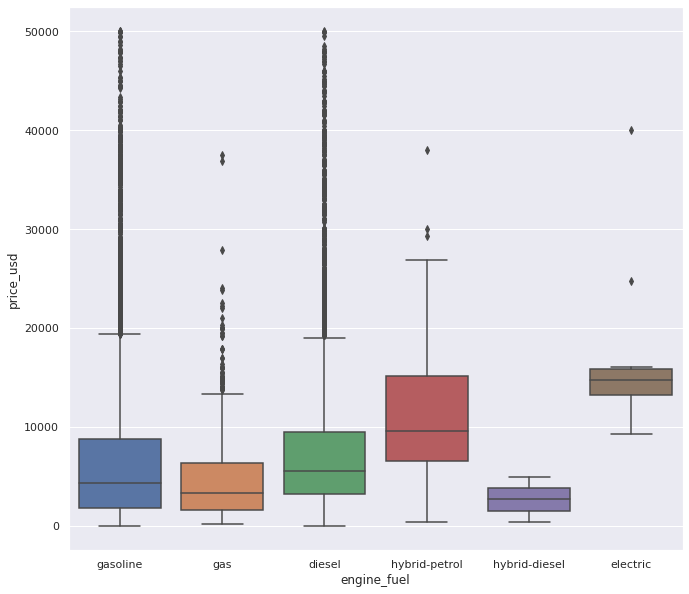

In [ ]:
sns.boxplot(x = df['engine_fuel'] , y = df['price_usd'], data = df)


El diagrama de caja permite ver mucho mejor la distribución de los datos por categorías

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f7ed4f37-4313-47ef-a399-629d97cb985b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>